<a href="https://colab.research.google.com/github/aeyjeyaryan/Deep-Learning/blob/main/Breast%20Cancer%20Prediction%20Using%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install tensorflow

In [25]:
## importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [26]:
#it is a dataset of cancer diagnosis
dataset = pd.read_csv('data.csv')

In [27]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [28]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [29]:
dataset.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [30]:
## Diagnosis (M = malignant, B = benign) is out target.

In [31]:
dataset.shape

(569, 33)

In [32]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [33]:
dataset.drop('Unnamed: 32',inplace=True,axis=1)  #un named has all the values as null

In [34]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
diagno = pd.get_dummies(dataset['diagnosis'],drop_first=True)

In [45]:
dataset = dataset.drop(['diagnosis'],axis=1)

In [46]:
dataset = pd.concat([dataset,diagno],axis=1)

In [47]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [50]:
dataset.shape

(569, 32)

In [54]:
# dividing the datset into independent and dependent features

X = dataset.iloc[:,1:31]
y = dataset.iloc[:,31]

In [56]:
y.tail()

564    1
565    1
566    1
567    1
568    0
Name: M, dtype: uint8

In [60]:
# Splitting into train and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)


In [61]:
#FEATURE SCALING

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [64]:
#creating the ANN

In [65]:
model = tf.keras.Sequential()

In [68]:
# adding the input layer
model.add(tf.keras.layers.Dense(units=18, activation=tf.keras.activations.relu))


In [67]:
#adding first hidden layer
model.add(tf.keras.layers.Dense(units=9,activation='relu'))

In [69]:
#adding second hidden layer
model.add(tf.keras.layers.Dense(units=9,activation= 'relu'))

In [71]:
#adding third hidden layer
model.add(tf.keras.layers.Dense(8,'relu'))

In [72]:
#adding output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [73]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [74]:

early_stop =tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [76]:
model_history = model.fit(X_train,y_train,batch_size=10,epochs=40,validation_data=(X_test,y_test),callbacks=early_stop)

Epoch 1/40
46/46 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.9934 - val_loss: 0.1108 - val_accuracy: 0.9649
Epoch 2/40
46/46 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9934 - val_loss: 0.1082 - val_accuracy: 0.9649
Epoch 3/40
46/46 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9934 - val_loss: 0.1122 - val_accuracy: 0.9649
Epoch 4/40
46/46 [==============================] - 0s 4ms/step - loss: 0.0248 - accuracy: 0.9934 - val_loss: 0.1162 - val_accuracy: 0.9649
Epoch 5/40
46/46 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9912 - val_loss: 0.1206 - val_accuracy: 0.9737
Epoch 6/40
46/46 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9912 - val_loss: 0.1246 - val_accuracy: 0.9649
Epoch 7/40
46/46 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9934 - val_loss: 0.1224 - val_accuracy: 0.9737
Epoch 8/40
46/46 [==

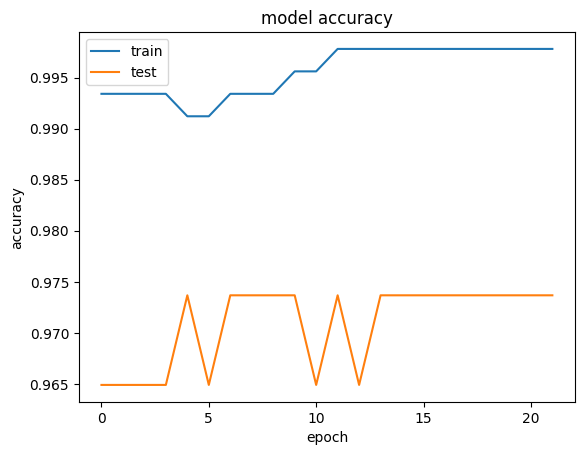

In [78]:
#summarizing the history of accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

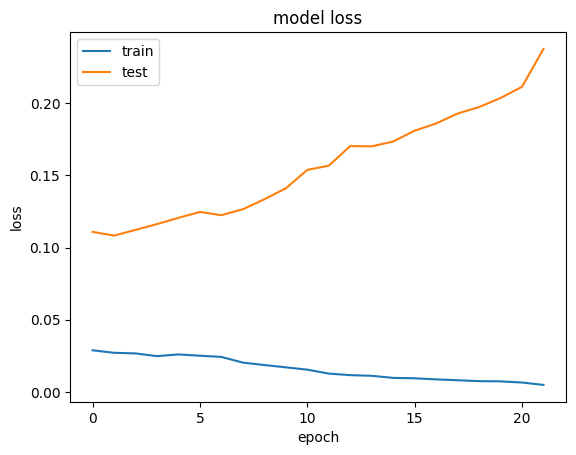

In [79]:
#summarizing the history of loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [80]:
#making predictions and evaluating the model

y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)    #if y pred is greater or equal to .5 we'll take it as 1 or else 0

4/4 [==============================] - 0s 4ms/step


In [82]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
# A confusion matrix is used to measure the performance of a classifier in depth.

In [83]:
cm

array([[65,  2],
       [ 1, 46]])

65: This is the number of instances where the actual class was 0 (or the negative class) and the model predicted 0 correctly. This is called true negatives (TN).
2: This is the number of instances where the actual class was 0 but the model predicted 1 incorrectly. This is called false positives (FP).
1: This is the number of instances where the actual class was 1 (or the positive class) but the model predicted 0 incorrectly. This is called false negatives (FN).
46: This is the number of instances where the actual class was 1 and the model predicted 1 correctly. This is called true positives (TP).

In [84]:
#calculating the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [85]:
score

0.9736842105263158